import drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


importing required libraries

In [2]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import tensorflow as tf
%matplotlib inline
import math 
import datetime
import time


Generatin train data

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255)

In [4]:
train_data_dir = '/content/drive/MyDrive/WBC/WBC/disease_detection/Train'

In [5]:
epochs = 7 #this has been changed after multiple model run 
# batch size used by flow_from_directory and predict_generator 
batch_size = 50
img_width =224
img_height= 224

In [6]:
#training data
generator_top = datagen.flow_from_directory( 
   train_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_train_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 

train_data = np.load('/content/drive/MyDrive/WBC/WBC/disease_detection/disease_train.npy')
# get the class labels for the training data, in the original order 
train_labels = generator_top.classes  
 
# convert the training labels to categorical vectors 
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 1136 images belonging to 2 classes.


Importing vgg

In [7]:
from tensorflow.keras.applications import VGG19 # VGG19
vgg_conv = VGG19(weights='imagenet',include_top=False,input_shape=(224, 224, 3))

80150528/80134624 [==============================] - 0s 0us/step


In [8]:
train_data = np.reshape(train_data, (1136,512*7*7))

In [9]:
X = train_data
y=train_labels[:,1]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Preparing the svm model

In [12]:

from sklearn.svm import SVC 
clf = SVC(kernel='linear')
 
# fitting x samples and y classes
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [14]:
y_pred = clf.predict(X_test)

In [15]:
from  sklearn .metrics import classification_report,confusion_matrix
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       124
         1.0       0.87      0.92      0.90       104

    accuracy                           0.90       228
   macro avg       0.90      0.91      0.90       228
weighted avg       0.91      0.90      0.90       228



In [17]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[110  14]
 [  8  96]]


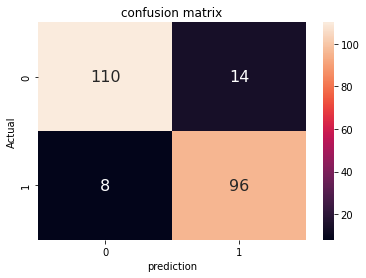

In [18]:

import seaborn 
seaborn .heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');


SAving the model

In [ ]:
import pickle
# save the model to disk
filename = '/content/finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

DEfining function for  test image reading

In [ ]:
def read_image(file_path):
   print('[INFO] loading and preprocessing image…') 
   image = load_img(file_path, target_size=(224, 224)) 
   image = img_to_array(image) 
   image = np.expand_dims(image, axis=0)
   image /= 255. 
   return image

Load model..... 

In [ ]:
model = pickle.load(open('/content/finalized_model.sav', 'rb'))

DEfine test function

In [ ]:
def test_single_image(path):
  labels = ['blast_cell' ,'normal_cell']
  images = read_image(path)
  time.sleep(.5)
  bt_prediction = vgg_conv.predict(images)
  bt_prediction=np.reshape(bt_prediction, (1,512*7*7))
  preds = model.predict(bt_prediction)
  return preds
  #for idx, label, x in zip(range(0,6), labels , preds[0]):
   #print('ID: {}, Label: {} {}%'.format(idx, label, round(x*100,2) ))

Predicting the result... 
You should give the image path in the path variable

In [ ]:
path = '/content/drive/MyDrive/WBC/WBC/disease_detection/Train/normal_cell/Im131_0.tif'
pred = test_single_image(path)

[INFO] loading and preprocessing image…


Converting the predictions into class

In [ ]:
if pred[0]==0:
  print("Blast cell")

if pred[0]==1:
  print("Normal cell")

Normal cell
